In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
cv2.__version__

'4.5.1'

In [18]:
def crop(img, x, y, width, height):
    return img[y:(y+height), x:(x+width)]

## Player 1

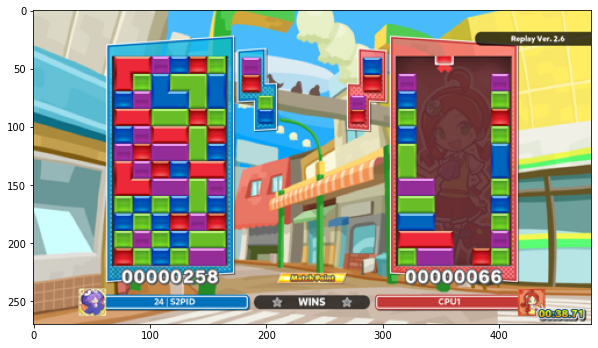

In [19]:
img = np.array(Image.open('./images/regions/blocks.png').resize((1920 // 4, 1080 // 4)))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

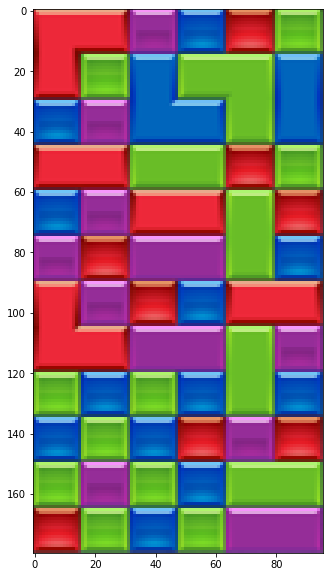

In [20]:
PUYO_W = 16
PUYO_H = 15
FIELD_W = PUYO_W * 6
FIELD_H = PUYO_H * 12

p1_field_x = 70
p1_field_y = 40
p1_field = crop(img, p1_field_x, p1_field_y, FIELD_W, FIELD_H)
plt.figure(figsize=(10, 10))
plt.imshow(p1_field)

plt.show()

76 222 84 15


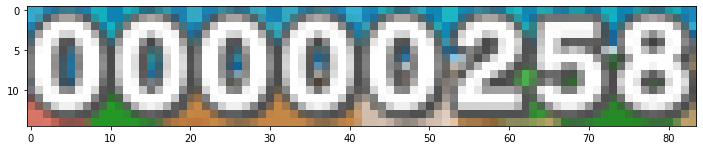

In [21]:
p1_score_x = p1_field_x + 6
p1_score_y = p1_field_y + FIELD_H + 2
score_width = 84
score_height = 15
print(p1_score_x, p1_score_y, score_width, score_height)

p1_score = crop(img, p1_score_x, p1_score_y, score_width, score_height)
plt.figure(figsize=(12, 12))
plt.imshow(p1_score)
plt.show()

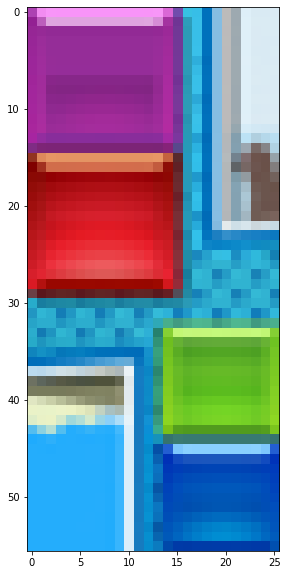

In [22]:
p1_fullnext_x = p1_field_x + FIELD_W + 14
p1_fullnext_y = p1_field_y + 1
fullnext_width = 26
fullnext_height = 56

p1_fullnext = crop(img, p1_fullnext_x, p1_fullnext_y, fullnext_width, fullnext_height)
plt.figure(figsize=(10, 10))
plt.imshow(p1_fullnext)
plt.show()

0 180 56 16 15
1 180 41 16 15
2 194 86 12 11
3 194 74 12 11


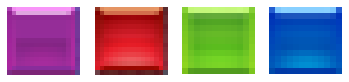

In [23]:
p1_nextpuyos = [
    crop(img, p1_fullnext_x, p1_fullnext_y, PUYO_W, PUYO_H),
    crop(img, p1_fullnext_x, p1_fullnext_y + PUYO_H, PUYO_W, PUYO_H),
    crop(img, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3, 12, 11),
    crop(img, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11),
]

print(0, p1_fullnext_x, p1_fullnext_y + PUYO_H, PUYO_W, PUYO_H)
print(1, p1_fullnext_x, p1_fullnext_y, PUYO_W, PUYO_H)
print(2, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11)
print(3, p1_fullnext_x + 14, p1_fullnext_y + PUYO_H * 2 + 3, 12, 11)

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(p1_nextpuyos[i])
    ax[i].axis("off")
plt.show()

## Player 2

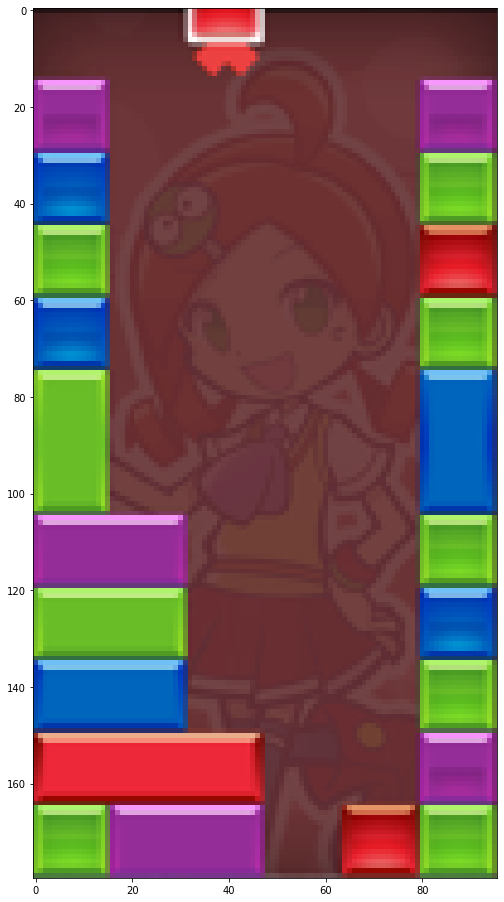

In [24]:
p2_field_x = 314
p2_field_y = 40
p2_field = crop(img, p2_field_x, p2_field_y, FIELD_W, FIELD_H)
plt.figure(figsize=(16, 16))
plt.imshow(p2_field)

plt.show()

320 222


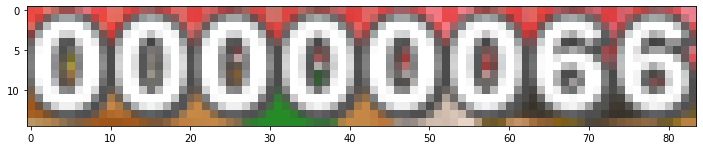

In [25]:
p2_score_x = p2_field_x + 6
p2_score_y = p2_field_y + FIELD_H + 2
print(p2_score_x, p2_score_y)

p2_score = crop(img, p2_score_x, p2_score_y, score_width, score_height)
plt.figure(figsize=(12, 12))
plt.imshow(p2_score)
plt.show()

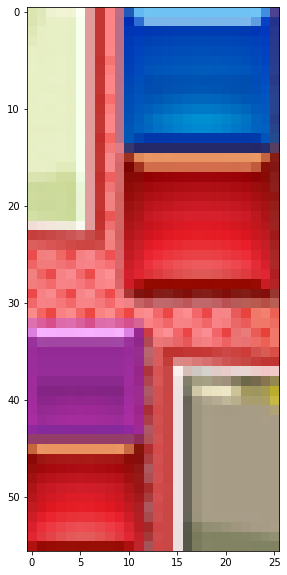

In [26]:
p2_fullnext_x = p2_field_x - fullnext_width - 14
p2_fullnext_y = p2_field_y + 1

p2_fullnext = crop(img, p2_fullnext_x, p2_fullnext_y, fullnext_width, fullnext_height)
plt.figure(figsize=(10, 10))
plt.imshow(p2_fullnext)
plt.show()

284 56 16 15
284 41 16 15
274 86 12 11
274 74 12 11


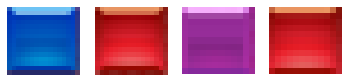

In [27]:
p2_nextpuyos = [
    crop(img, p2_fullnext_x + 10, p2_fullnext_y, PUYO_W, PUYO_H),
    crop(img, p2_fullnext_x + 10, p2_fullnext_y + PUYO_H, PUYO_W, PUYO_H),
    crop(img, p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3, 12, 11),
    crop(img, p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11),
]

print(p2_fullnext_x + 10, p2_fullnext_y + PUYO_H, PUYO_W, PUYO_H)
print(p2_fullnext_x + 10, p2_fullnext_y, PUYO_W, PUYO_H)
print(p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3 + 12, 12, 11)
print(p2_fullnext_x, p2_fullnext_y + PUYO_H * 2 + 3, 12, 11)

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(p2_nextpuyos[i])
    ax[i].axis("off")
plt.show()

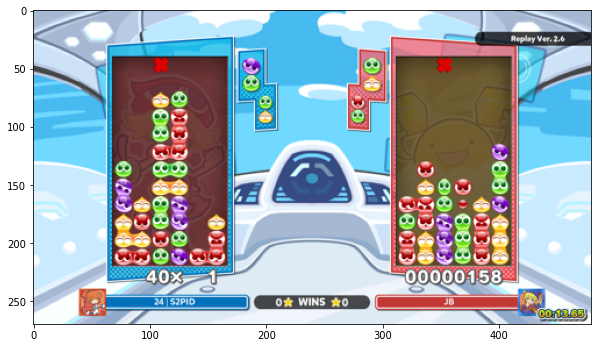

In [28]:
img = np.array(Image.open("./images/regions/p1score.png").resize((1920 // 4, 1080 // 4)))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

## Threshold Empty space when multiplier appears

### Negative case - Player 1

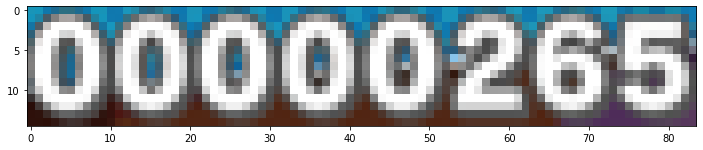

In [29]:
img = np.array(Image.open("./images/regions/p1field.png").resize((1920 // 4, 1080 // 4)))
p1_score = crop(img, p1_score_x, p1_score_y, score_width, score_height)
plt.figure(figsize=(12, 12))
plt.imshow(p1_score)
plt.show()

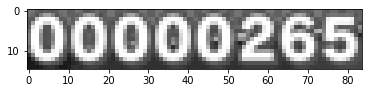

In [30]:
img_gray = cv2.cvtColor(p1_score, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)

Fraction of black pixels:  0.64


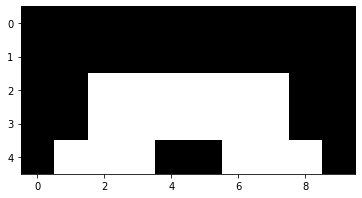

In [31]:
target = img_gray[:5, :10]
ret, target = cv2.threshold(target, 180, 255, cv2.THRESH_BINARY)
plt.imshow(target, cmap="gray", vmin=0, vmax=255)

# Calculate the fraction of black pixels
def fractionBlack(img: np.ndarray):
    total = img.shape[0] * img.shape[1]
    white = cv2.countNonZero(img)
    black = total - white
    return black / total

p_black = fractionBlack(target)
print("Fraction of black pixels: ", p_black)

### Positive case - Player 1

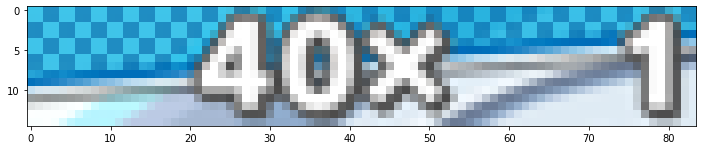

In [32]:
img = np.array(Image.open("./images/regions/p1score.png").resize((1920 // 4, 1080 // 4)))
p1_score = crop(img, p1_score_x, p1_score_y, score_width, score_height)
plt.figure(figsize=(12, 12))
plt.imshow(p1_score)
plt.show()

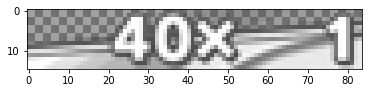

In [33]:
img_gray = cv2.cvtColor(p1_score, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)

Fraction of black pixels:  1.0


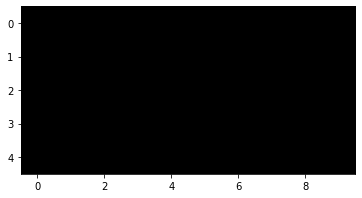

In [34]:
target = img_gray[:5, :10]
ret, target = cv2.threshold(target, 180, 255, cv2.THRESH_BINARY)
plt.imshow(target, cmap="gray", vmin=0, vmax=255)

# Calculate the fraction of black pixels
def fractionBlack(img: np.ndarray):
    total = img.shape[0] * img.shape[1]
    white = cv2.countNonZero(img)
    black = total - white
    return black / total

p_black = fractionBlack(target)
print("Fraction of black pixels: ", p_black)

### Negative case - Player 2

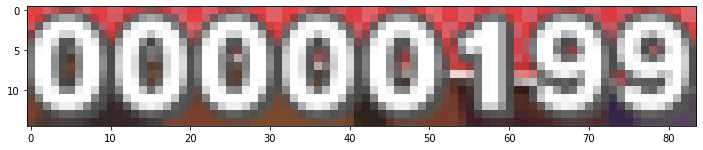

In [35]:
img = np.array(Image.open("./images/regions/p1field.png").resize((1920 // 4, 1080 // 4)))
p2_score = crop(img, p2_score_x, p2_score_y, score_width, score_height)
plt.figure(figsize=(12, 12))
plt.imshow(p2_score)
plt.show()

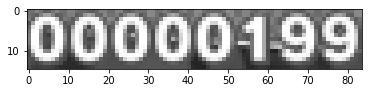

In [36]:
img_gray = cv2.cvtColor(p2_score, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)

Fraction of black pixels:  0.64


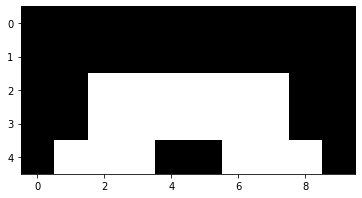

In [37]:
target = img_gray[:5, :10]
ret, target = cv2.threshold(target, 180, 255, cv2.THRESH_BINARY)
plt.imshow(target, cmap="gray", vmin=0, vmax=255)

# Calculate the fraction of black pixels
def fractionBlack(img: np.ndarray):
    total = img.shape[0] * img.shape[1]
    white = cv2.countNonZero(img)
    black = total - white
    return black / total

p_black = fractionBlack(target)
print("Fraction of black pixels: ", p_black)

### Positive case - Player 2

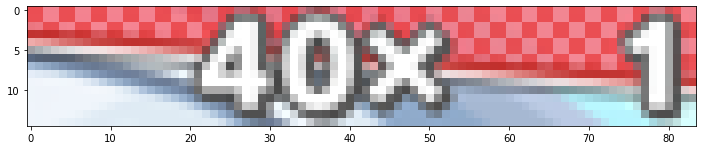

In [38]:
img = np.array(Image.open("./images/regions/p2score.png").resize((1920 // 4, 1080 // 4)))
p2_score = crop(img, p2_score_x, p2_score_y, score_width, score_height)
plt.figure(figsize=(12, 12))
plt.imshow(p2_score)
plt.show()

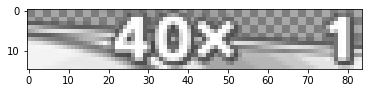

In [39]:
img_gray = cv2.cvtColor(p2_score, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)

Fraction of black pixels:  0.96


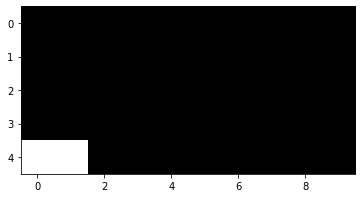

In [40]:
target = img_gray[:5, :10]
ret, target = cv2.threshold(target, 180, 255, cv2.THRESH_BINARY)
plt.imshow(target, cmap="gray", vmin=0, vmax=255)

# Calculate the fraction of black pixels
def fractionBlack(img: np.ndarray):
    total = img.shape[0] * img.shape[1]
    white = cv2.countNonZero(img)
    black = total - white
    return black / total

p_black = fractionBlack(target)
print("Fraction of black pixels: ", p_black)